<a href="https://colab.research.google.com/github/megumihoshino/Comparative-Study-of-Machine-Learning-Models-for-Predictive-Maintenance/blob/main/Comparative_Study_of_Machine_Learning_Models_for_Predictive_Maintenance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
#import all library

import csv
import io
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.image as img
import tensorflow as tf

from imblearn.over_sampling import SMOTE
from collections import Counter

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

%matplotlib inline

In [10]:
pred_main = pd.read_csv('/content/sample_data/ai 2020.csv')
pred_main

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,0,0,0,0,0,0
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,0,0,0,0,0,0
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,0,0,0,0,0,0
9998,9999,H39412,H,299.0,308.7,1408,48.5,25,0,0,0,0,0,0


In [11]:
import warnings
warnings.filterwarnings("ignore")

In [12]:
pred_main[pred_main["Machine failure"] ==1]

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
50,51,L47230,L,298.9,309.1,2861,4.6,143,1,0,0,1,0,0
69,70,L47249,L,298.9,309.0,1410,65.7,191,1,0,0,1,1,0
77,78,L47257,L,298.8,308.9,1455,41.3,208,1,1,0,0,0,0
160,161,L47340,L,298.4,308.2,1282,60.7,216,1,0,0,0,1,0
161,162,L47341,L,298.3,308.1,1412,52.3,218,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9758,9759,L56938,L,298.6,309.8,2271,16.2,218,1,1,0,0,0,0
9764,9765,L56944,L,298.5,309.5,1294,66.7,12,1,0,0,1,0,0
9822,9823,L57002,L,298.5,309.4,1360,60.9,187,1,0,0,0,1,0
9830,9831,L57010,L,298.3,309.3,1337,56.1,206,1,0,0,0,1,0


**DATA PREPROCESSING**

In [14]:
pred_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Machine failure          10000 non-null  int64  
 9   TWF                      10000 non-null  int64  
 10  HDF                      10000 non-null  int64  
 11  PWF                      10000 non-null  int64  
 12  OSF                      10000 non-null  int64  
 13  RNF                      10000 non-null  int64  
dtypes: float64(3), int64(9)

In [15]:
pred_main.isnull().sum()

,0
UDI,0
Product ID,0
Type,0
Air temperature [K],0
Process temperature [K],0
Rotational speed [rpm],0
Torque [Nm],0
Tool wear [min],0
Machine failure,0
TWF,0


In [16]:
pred_main.duplicated().sum()

np.int64(0)

In [17]:
pred_main.dtypes

,0
UDI,int64
Product ID,object
Type,object
Air temperature [K],float64
Process temperature [K],float64
Rotational speed [rpm],int64
Torque [Nm],float64
Tool wear [min],int64
Machine failure,int64
TWF,int64


In [18]:
pred_main.nunique()

,0
UDI,10000
Product ID,10000
Type,3
Air temperature [K],93
Process temperature [K],82
Rotational speed [rpm],941
Torque [Nm],577
Tool wear [min],246
Machine failure,2
TWF,2


In [19]:
pred_main['Type'].value_counts()

,count
Type,
L,6000
M,2997
H,1003


ada 6000 data LOW, lalu 2997 data medium, dan 1003 high

In [21]:
pred_main.drop(columns = ['UDI', 'Product ID'], inplace = True)

**FEATURE ENGINEERING**

membuat fitur baru, yaitu **"temperature difference"**
dimana fitur tersebut kita dapatkan dari pengurangan antara *"process temperature - air temperature"*

In [22]:
pred_main['temperature difference'] = pred_main['Process temperature [K]'] - pred_main['Air temperature [K]']

Membuat fitur baru: **mechanical power**

rumusnya: *torque* * *rotational speed*



In [27]:
pred_main['mechanical power'] = np.round((pred_main['Torque [Nm]'] * pred_main['Rotational speed [rpm]']*2*np.pi)/60)

In [28]:
pred_main

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF,temperature difference,mechanical power
0,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0,10.5,6952.0
1,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0,10.5,6827.0
2,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0,10.4,7749.0
3,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0,10.4,5928.0
4,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0,10.5,5898.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,M,298.8,308.4,1604,29.5,14,0,0,0,0,0,0,9.6,4955.0
9996,H,298.9,308.4,1632,31.8,17,0,0,0,0,0,0,9.5,5435.0
9997,M,299.0,308.6,1645,33.4,22,0,0,0,0,0,0,9.6,5754.0
9998,H,299.0,308.7,1408,48.5,25,0,0,0,0,0,0,9.7,7151.0


**DESKRIPSI STATISTIK**

In [29]:
pred_main.describe().T

,count,mean,std,min,25%,50%,75%,max
Air temperature [K],10000.0,300.00493,2.000259,295.3,298.3,300.1,301.5,304.5
Process temperature [K],10000.0,310.00556,1.483734,305.7,308.8,310.1,311.1,313.8
Rotational speed [rpm],10000.0,1538.77610,179.284096,1168.0,1423.0,1503.0,1612.0,2886.0
Torque [Nm],10000.0,39.98691,9.968934,3.8,33.2,40.1,46.8,76.6
Tool wear [min],10000.0,107.95100,63.654147,0.0,53.0,108.0,162.0,253.0
Machine failure,10000.0,0.03390,0.180981,0.0,0.0,0.0,0.0,1.0
TWF,10000.0,0.00460,0.067671,0.0,0.0,0.0,0.0,1.0
HDF,10000.0,0.01150,0.106625,0.0,0.0,0.0,0.0,1.0
PWF,10000.0,0.00950,0.097009,0.0,0.0,0.0,0.0,1.0
OSF,10000.0,0.00980,0.098514,0.0,0.0,0.0,0.0,1.0


**EDA (EXPLORATORY DATA ANALYSIS)**

*1.1 PLOTTING DISTRIBUSI TIPE2 MESIN*

Plotting ini berfungsi untuk agar kita bisa melihat mana saja tipe mesin yang tergolong Low (L), Medium (M), atau High (H)

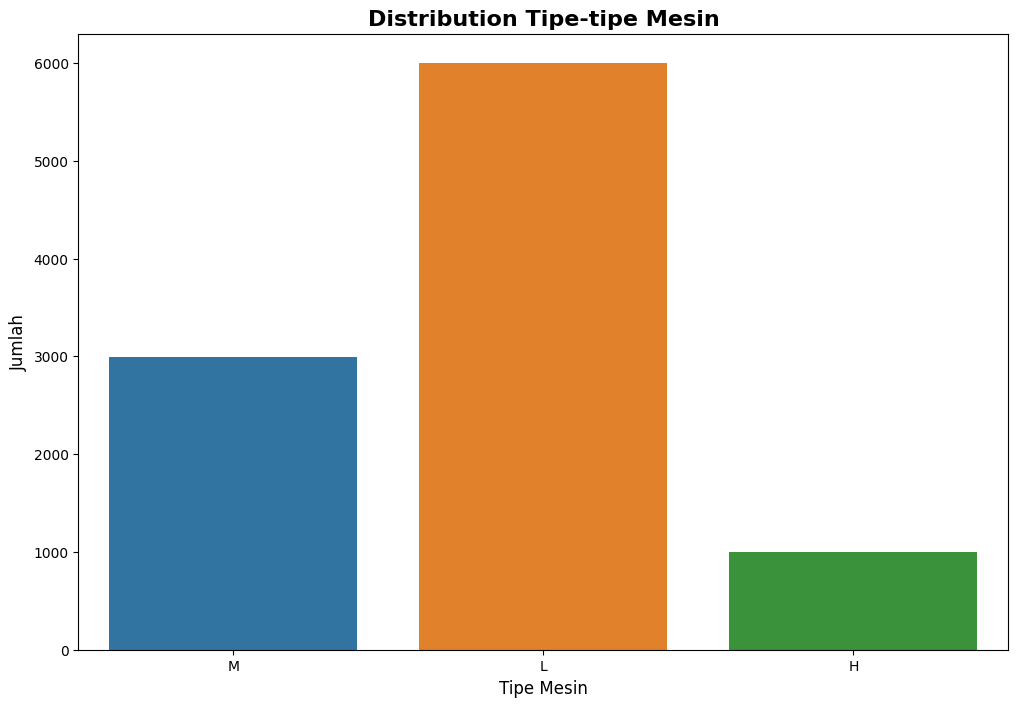

In [39]:
plt.figure(figsize=(12,8))
sns.countplot(x='Type', data=pred_main, hue = 'Type')
plt.title('Distribution Tipe-tipe Mesin', fontsize = 16, fontweight = 'bold')
plt.xlabel('Tipe Mesin', fontsize = 12)
plt.ylabel('Jumlah', fontsize = 12)
plt.show()

***1.2 Visualisasi Distribusi "Failure" terhadap Tipe-tipe Produk***

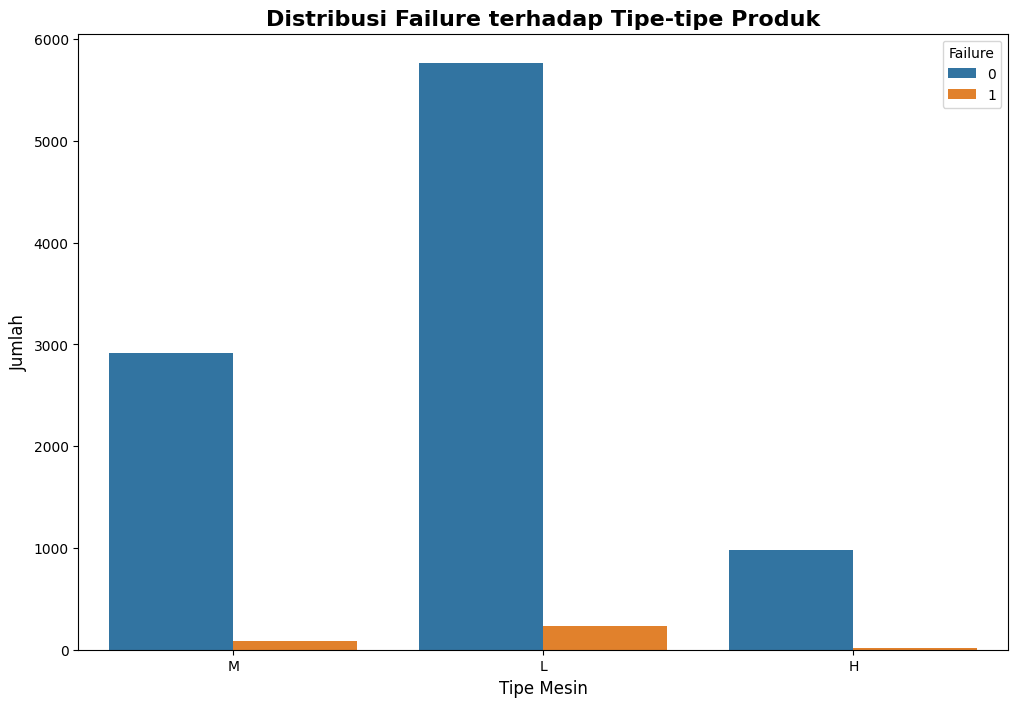

In [40]:
plt.figure(figsize = (12, 8))
sns.countplot(x = 'Type', hue = 'Machine failure', data = pred_main)
plt.title('Distribusi Failure terhadap Tipe-tipe Produk', fontsize = 16, fontweight = 'bold')
plt.xlabel('Tipe Mesin', fontsize = 12)
plt.ylabel('Jumlah', fontsize = 12)
plt.legend(title = 'Failure', loc = 'upper right')
plt.show()

***1.3 PLOTTING DISTRIBUSI FITUR-FITUR UNTUK MENGAMATI POLA ATAU ANOMALI***

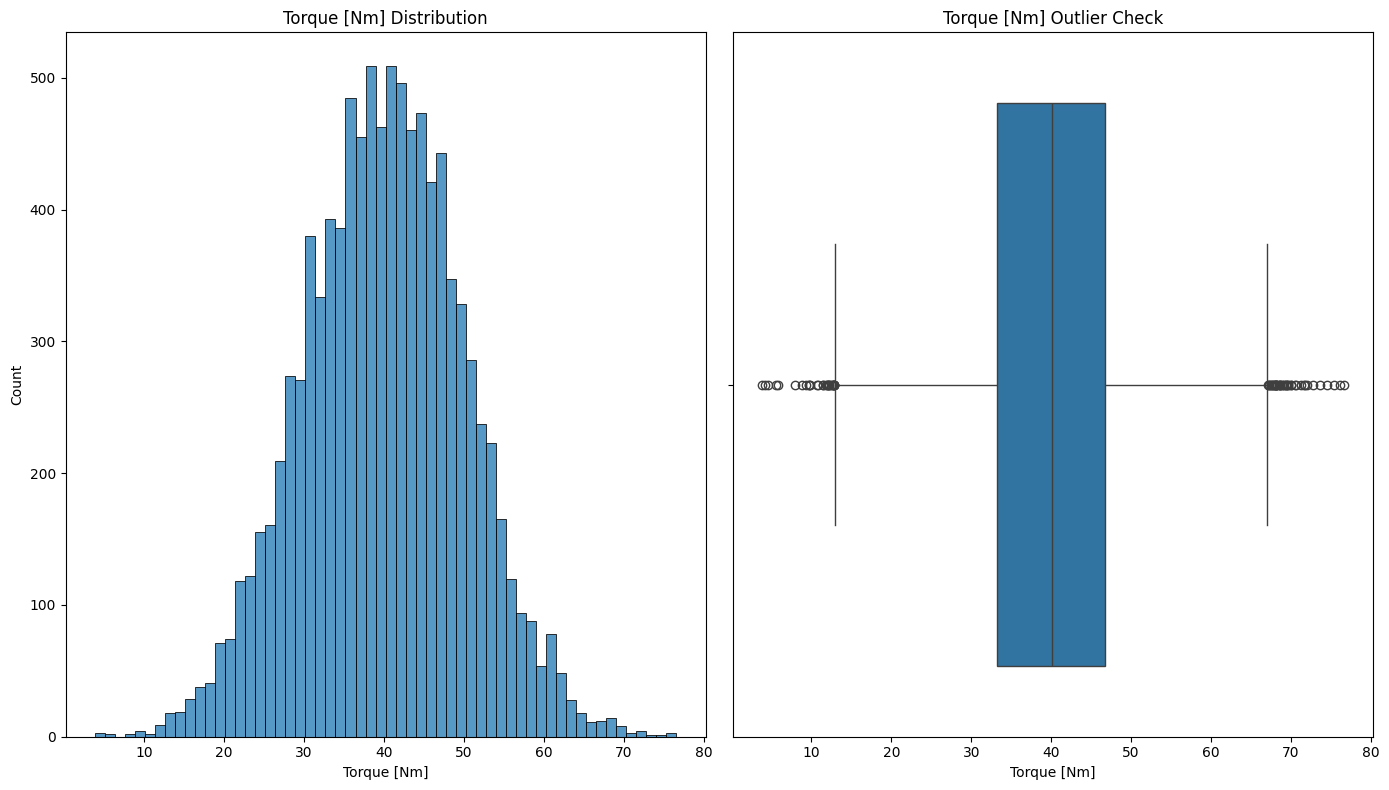

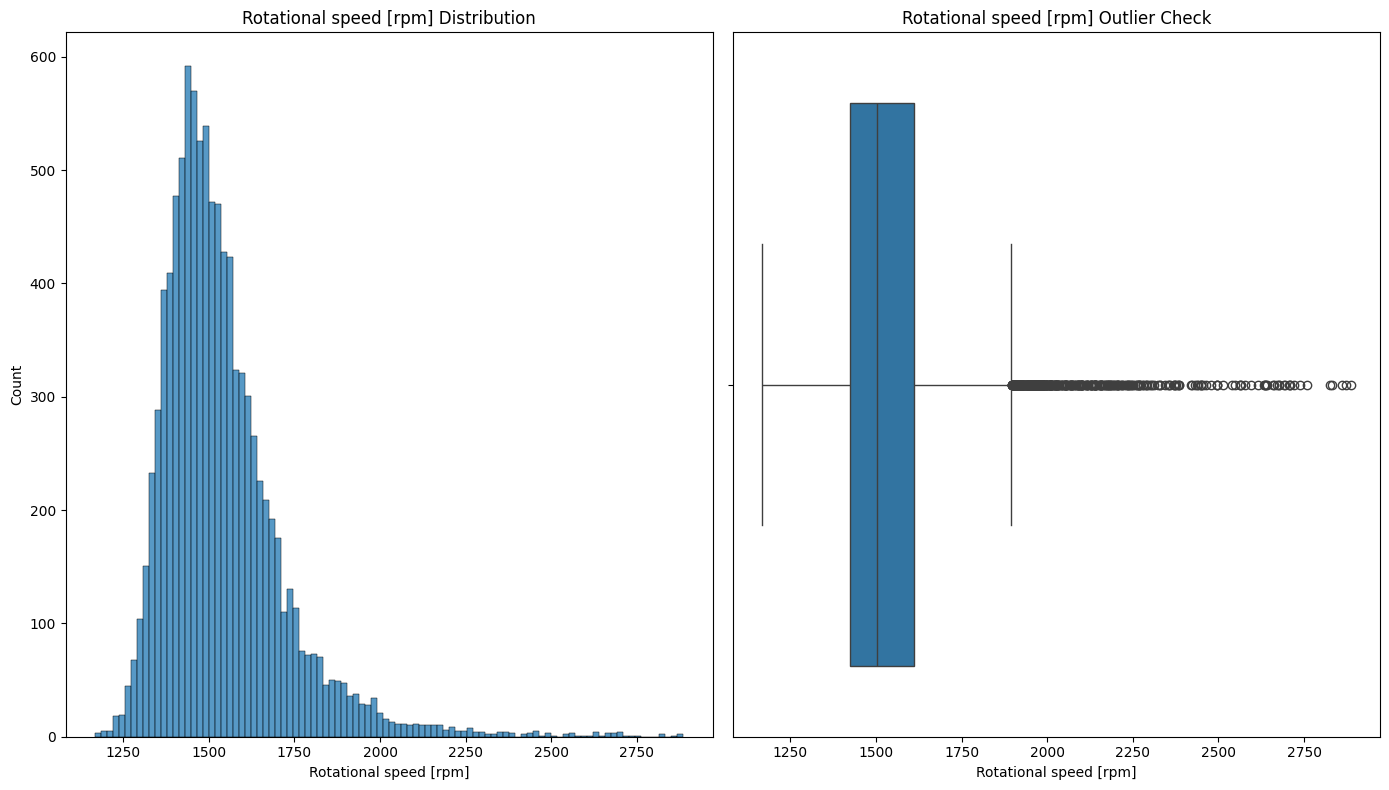

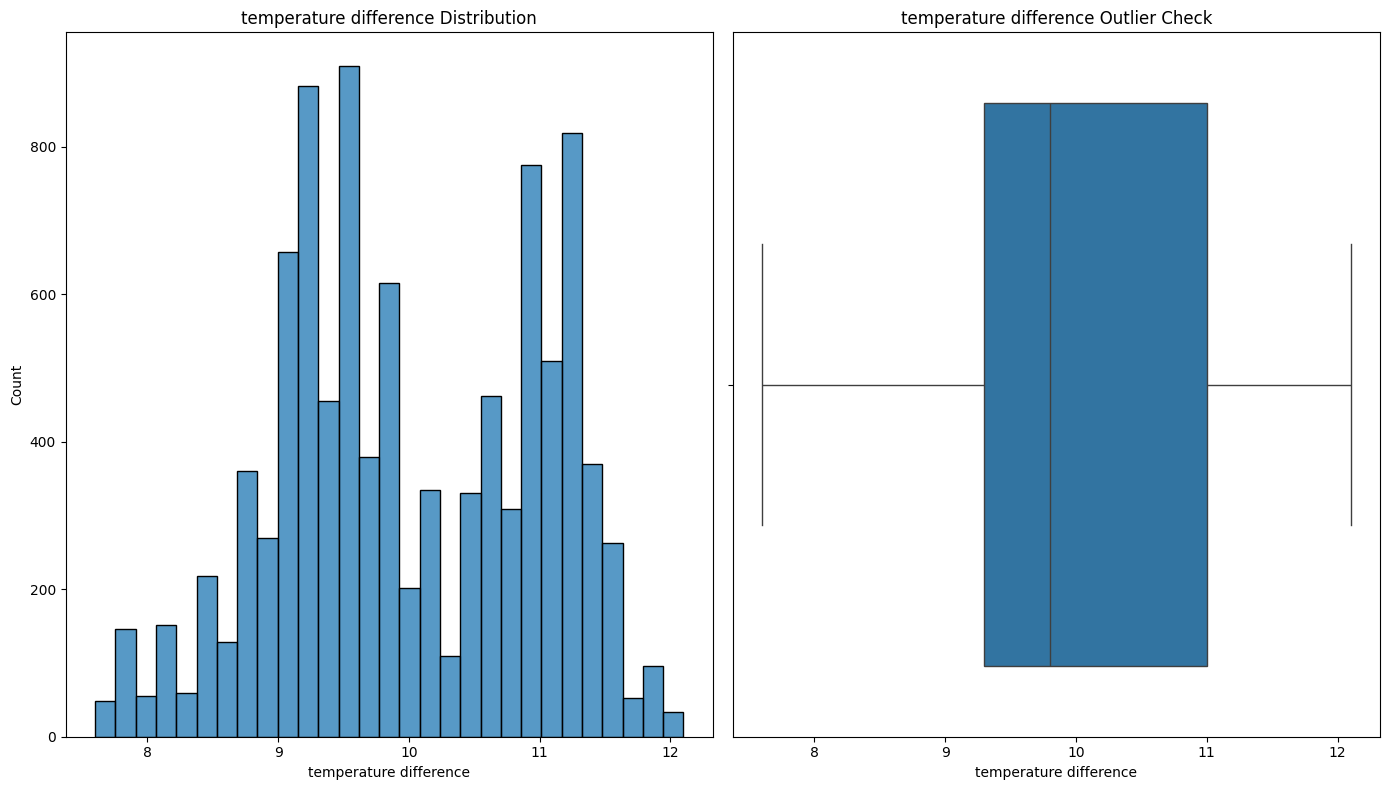

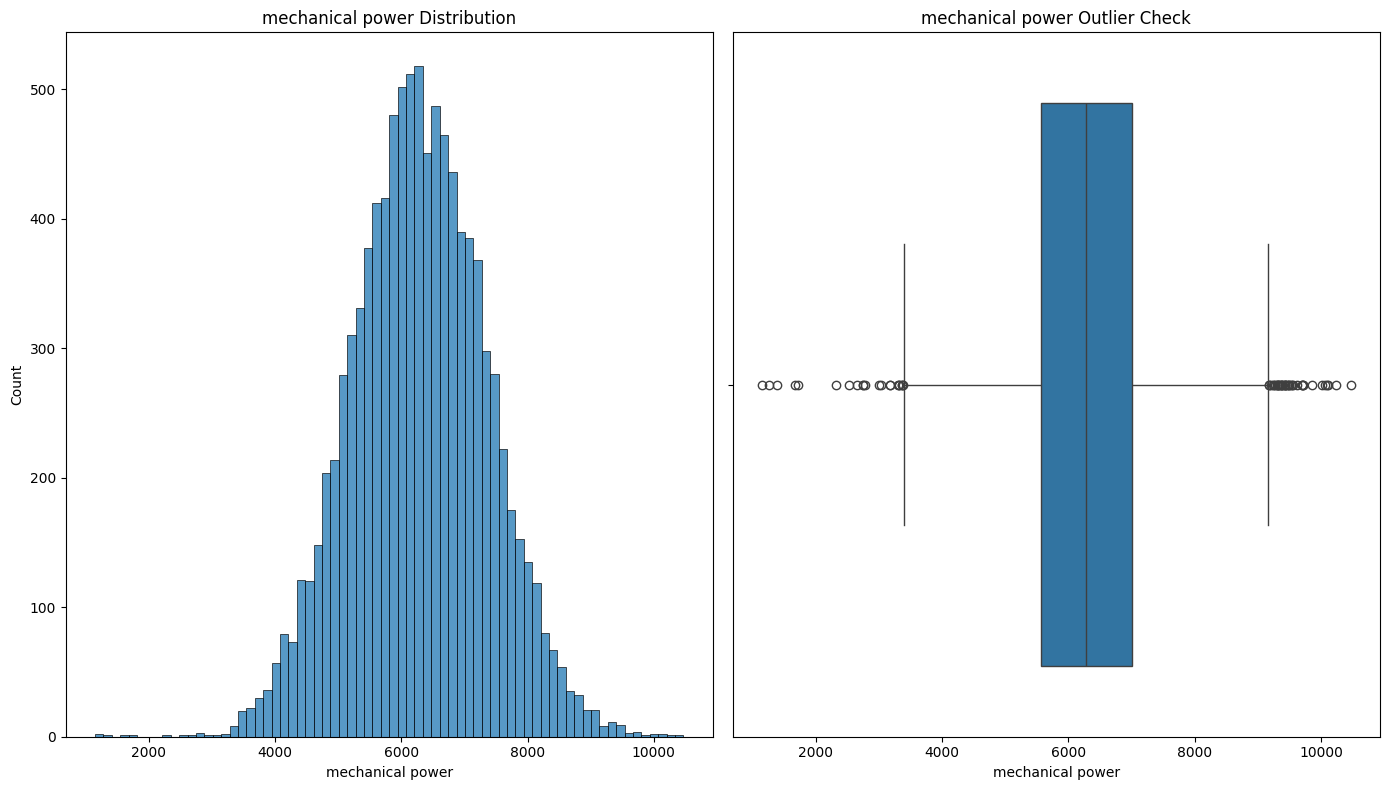

In [41]:
cols = ['Torque [Nm]', 'Rotational speed [rpm]', 'temperature difference', 'mechanical power']

for col in cols:
  fig, axes = plt.subplots(1,2, figsize= (14,8))

  sns.histplot(data = pred_main, x = col, ax = axes[0])
  axes[0].set_title(f"{col} Distribution")

  sns.boxplot(data = pred_main, x = col, ax = axes[1])
  axes[1].set_title(f"{col} Outlier Check")

  plt.tight_layout()
  plt.show()

***1.4 PAIRPLOT HUBUNGAN ANTAR FITUR (PAIRPLOT FEATURE RELATIONSHIP)***

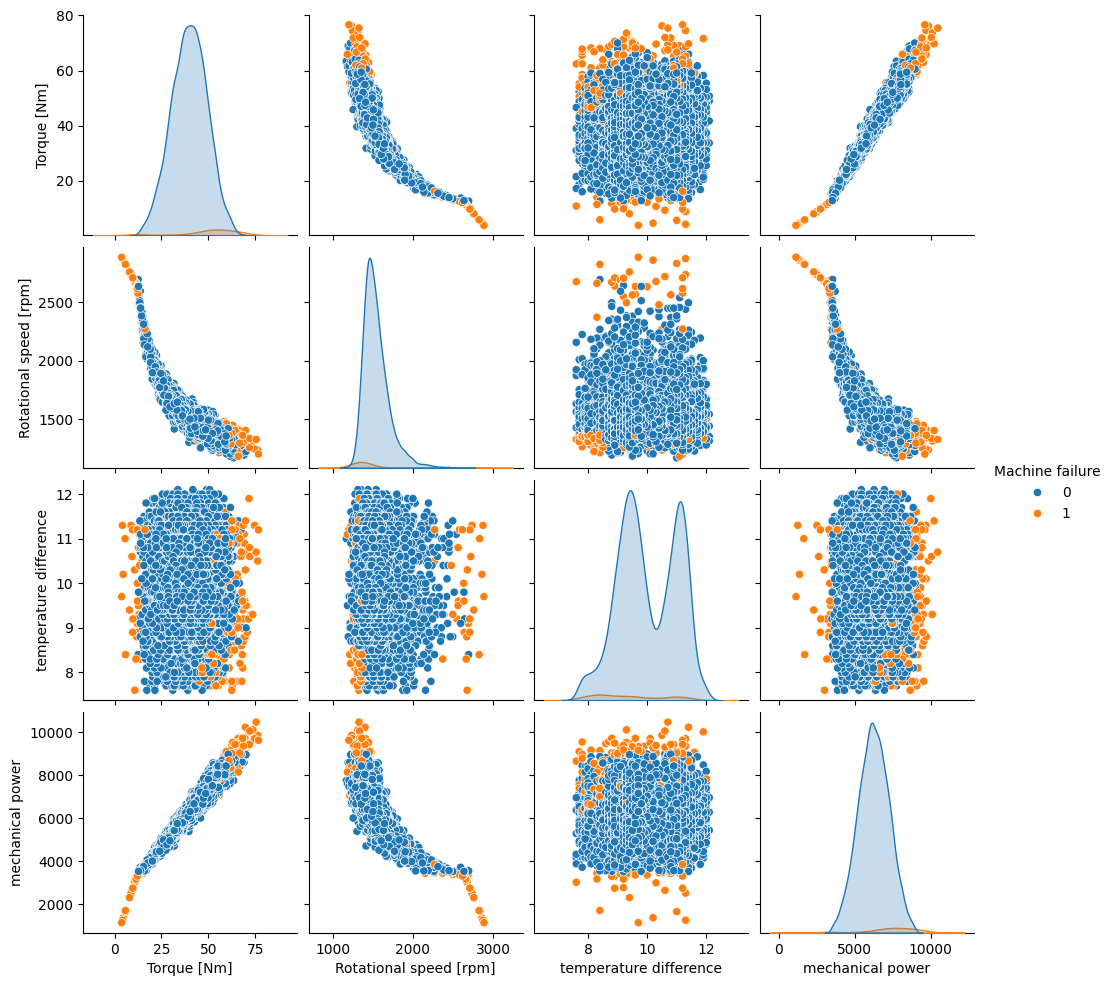

In [42]:
sns.pairplot(pred_main[['Torque [Nm]', 'Rotational speed [rpm]', 'temperature difference', 'mechanical power', 'Machine failure']], hue = 'Machine failure')
plt.show()

***1.5 KORELASI ANTAR FITUR***

<Axes: >

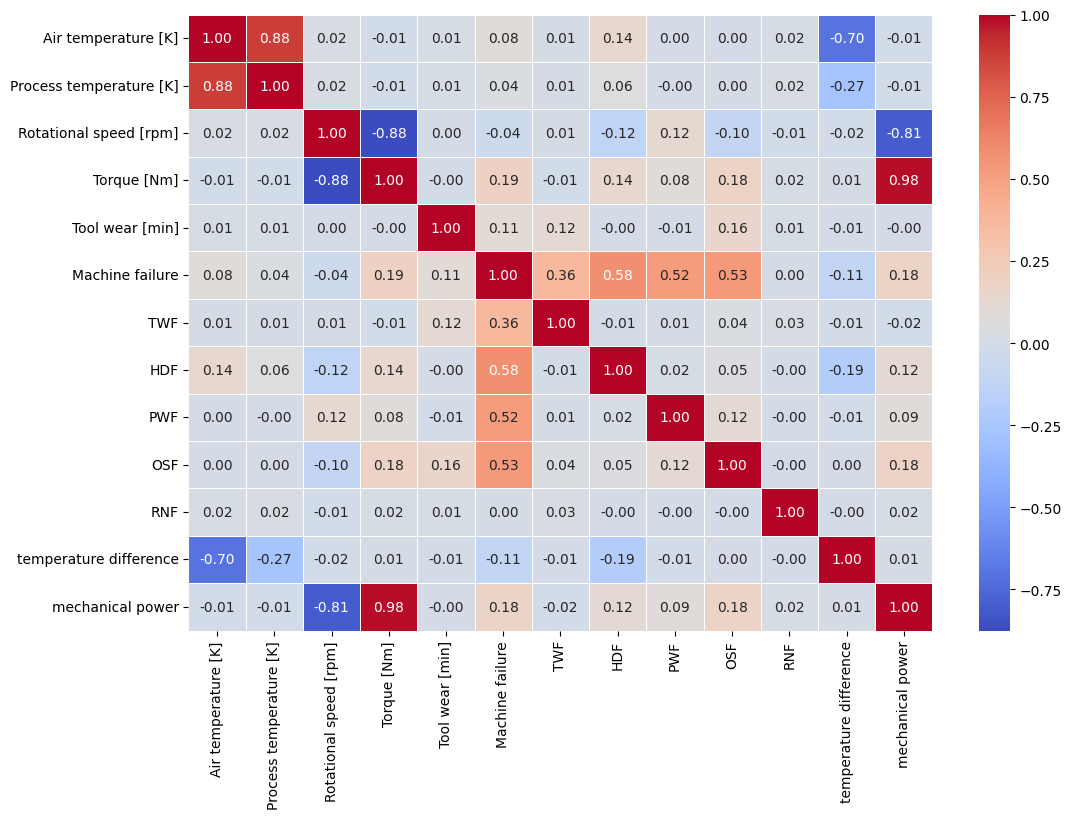

In [44]:
corr_matrix = pred_main.corr(numeric_only = True)
plt.figure(figsize = (12,8))
sns.heatmap(
    corr_matrix,
    annot = True,
    linewidths= 0.5,
    fmt = '.2f',
    cmap = 'coolwarm'
)

<Axes: >

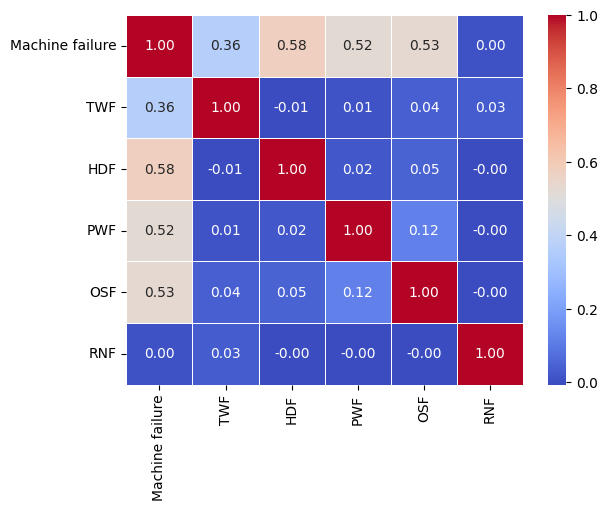

In [48]:
target = pred_main.iloc[:,[6,7,8,9,10,11]]
target_mat = target.corr()
sns.heatmap(
    target_mat,
    annot = True,
    linewidths = 0.5,
    fmt = '.2f',
    cmap = 'coolwarm'
)

Tool wear failure (TWF), heat dissipation failure (HDF),power failure (PWF),overstrain failure (OSF) and random failures (RNF) shows more positive correlation with target variable i.e. machine failure. Thus dropping columns 'TWF','HDF','PWF','OSF','RNF'.


In [49]:
pred_main.drop(columns = ['TWF','HDF','PWF','OSF','RNF'], inplace = True)

In [50]:
pred_main.sample(3)

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,temperature difference,mechanical power
8704,L,297.1,308.5,1425,40.0,35,0,11.4,5969.0
5536,M,302.3,311.8,1363,54.0,119,1,9.5,7708.0
4371,L,302.0,309.8,1480,40.0,199,0,7.8,6199.0


***1.6 ENCODING KOLOM***

In [52]:
from sklearn.preprocessing import LabelEncoder
pred_main['Type'] = LabelEncoder().fit_transform(pred_main['Type'])

***1.7 FEATURE SCALING***

In [53]:
scale = StandardScaler()
data = pd.DataFrame(scale.fit_transform(pred_main), columns=pred_main.columns, index = pred_main.index)

In [54]:
data.sample(15)

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,temperature difference,mechanical power
6774,-1.998335,0.597488,0.468059,1.161477,-1.272708,-1.146110,-0.187322,-0.500108,-1.204597
2984,-0.332223,0.297511,-0.205950,0.559051,-0.961727,0.205009,-0.187322,-0.899691,-0.994734
7758,-0.332223,0.197519,1.209468,0.837952,-0.921600,1.383310,-0.187322,1.397911,-0.779251
8273,1.333889,-0.502425,0.400658,1.384598,-1.784323,1.320467,-0.187322,1.597702,-1.991581
5221,-0.332223,1.947381,2.018279,0.486537,-0.861410,1.587549,-0.187322,-0.899691,-0.873876
7680,-0.332223,0.347507,1.142068,-0.801986,0.372485,1.681813,-0.187322,0.998328,0.097675
5357,-0.332223,1.647404,1.681275,2.394219,-1.944830,0.346405,-0.187322,-0.799795,-1.906324
6582,-0.332223,0.747476,0.333257,-0.060109,-0.430048,1.414731,-0.187322,-0.999587,-0.531913
5573,-0.332223,1.247436,1.479072,1.111275,-1.473342,-1.476034,-0.187322,-0.300317,-1.569045
8746,-0.332223,-1.352358,-1.014761,-0.060109,0.452738,0.503512,-0.187322,1.198119,0.788160


***1.8 SPLITTING DATA KE BENTUK FITUR X DAN TARGET Y***

In [55]:
Y = pred_main.pop("Machine failure")
X = pred_main

In [56]:
X

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],temperature difference,mechanical power
0,2,298.1,308.6,1551,42.8,0,10.5,6952.0
1,1,298.2,308.7,1408,46.3,3,10.5,6827.0
2,1,298.1,308.5,1498,49.4,5,10.4,7749.0
3,1,298.2,308.6,1433,39.5,7,10.4,5928.0
4,1,298.2,308.7,1408,40.0,9,10.5,5898.0
...,...,...,...,...,...,...,...,...
9995,2,298.8,308.4,1604,29.5,14,9.6,4955.0
9996,0,298.9,308.4,1632,31.8,17,9.5,5435.0
9997,2,299.0,308.6,1645,33.4,22,9.6,5754.0
9998,0,299.0,308.7,1408,48.5,25,9.7,7151.0


In [57]:
Y

,Machine failure
0,0
1,0
2,0
3,0
4,0
...,...
9995,0
9996,0
9997,0
9998,0


***1.9 BERHADAPAN DENGAN DATA YANG TIDAK SEIMBANG (DEALING WITH IMBALANCED DATA)***

In [58]:
from collections import Counter
counts = Counter(Y)
print(counts)

Counter({0: 9661, 1: 339})


In [59]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X,Y)

In [60]:
from collections import Counter
counts = Counter(y_resampled)
print(counts)

Counter({0: 9661, 1: 9661})


***1.10 TRAIN TEST SPLIT***

In [61]:
X_train, X_test, Y_train, Y_test = train_test_split(X_resampled, y_resampled, test_size = 0.1)

In [62]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV, SGDClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier,BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [63]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Logistic Regression CV': LogisticRegressionCV(),
    'SGD Classifier': SGDClassifier(),
    'Random Forest Classifier': RandomForestClassifier(),
    'Gradient Boosting Classifier': GradientBoostingClassifier(),
    'AdaBoost Classifier': AdaBoostClassifier(),
    'Bagging Classifier': BaggingClassifier(),
    'Decision Tree Classifier': DecisionTreeClassifier(),
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier()
}

In [65]:
def evaluate_model(X_train, X_test, Y_train, Y_test):
  result=[]
  for name, model in models.items():
    model.fit(X_train, Y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(Y_test, y_pred)
    result.append((name, accuracy))

  result.sort(key = lambda x: x[1], reverse = True)
  return result

results = evaluate_model(X_train, X_test, Y_train, Y_test)
print("Perfoma Model: ")
for name, accuracy in results:
  print(f"{name}: {accuracy: .3f}")

Perfoma Model: 
Random Forest Classifier:  0.988
Bagging Classifier:  0.979
Decision Tree Classifier:  0.973
Gradient Boosting Classifier:  0.951
K-Nearest Neighbors:  0.938
AdaBoost Classifier:  0.928
Logistic Regression:  0.864
Logistic Regression CV:  0.862
Support Vector Machine:  0.791
SGD Classifier:  0.585


dari pengujian model ini kita bisa lihat kalau model RANDOM FOREST menghasilkan nilai performa yang paling tinggi diantara model2 tsb

In [67]:
rf = RandomForestClassifier(class_weight = 'balanced')

rf.fit(X_train, Y_train)
y_pred = rf.predict(X_test)
accuracy = accuracy_score(Y_test, y_pred)
print(f"Akurasi: {accuracy: .3f}")

Akurasi:  0.988


Lalu kita cek performa model RF menggunakan akurasi, precision, recall dan skor F-1

In [70]:
from sklearn.metrics import(
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay,
    roc_auc_score,
    RocCurveDisplay,
    precision_recall_curve,
    PrecisionRecallDisplay,
)

In [74]:
def evaluate_model(model, X_test, y_test, model_name = "MODEL"):
  y_pred = model.predict(X_test)
  y_prob = model.predict_proba(X_test)[:, 1]

  print(f"Classification Report for {model_name}:")
  print(classification_report(y_test, y_pred))

  cm = confusion_matrix(y_test, y_pred)
  disp = ConfusionMatrixDisplay(confusion_matrix = cm)
  disp.plot(cmap = 'Blues')
  plt.title(f"Confusion Matrix for {model_name}")
  plt.show

  roc_auc = roc_auc_score(y_test, y_prob)
  RocCurveDisplay.from_predictions(y_test, y_prob)
  plt.title(f"ROC Curve for {model_name}")
  plt.show()

  precision, recall_score, _ = precision_recall_curve(y_test, y_prob)
  PrecisionRecallDisplay(precision = precision, recall = recall_score).plot()
  plt.title(f"Precision-Recall Curve for {model_name}")
  plt.show()

Classification Report for RANDOM FOREST:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       949
           1       0.99      0.99      0.99       984

    accuracy                           0.99      1933
   macro avg       0.99      0.99      0.99      1933
weighted avg       0.99      0.99      0.99      1933



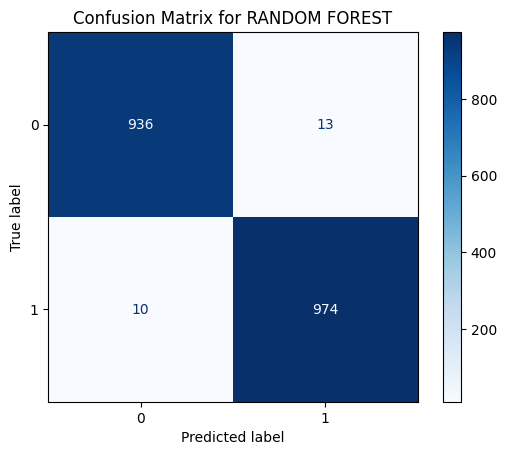

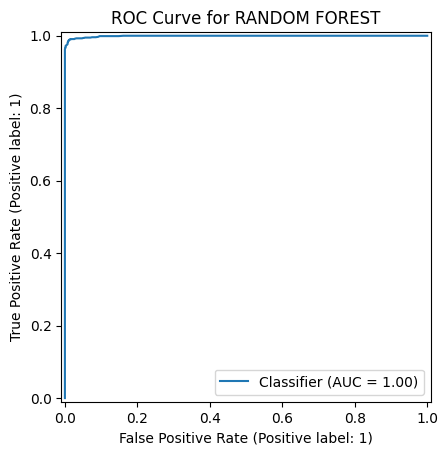

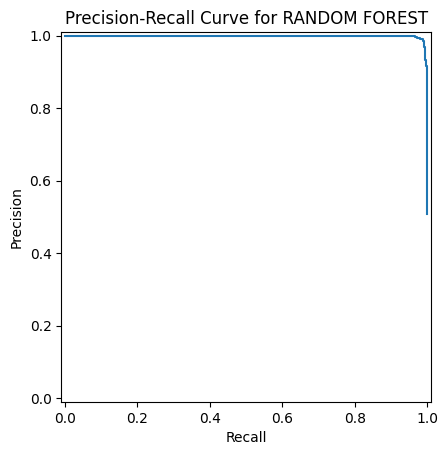

In [75]:
evaluate_model(rf, X_test, Y_test, model_name = "RANDOM FOREST")

<function matplotlib.pyplot.show(close=None, block=None)>

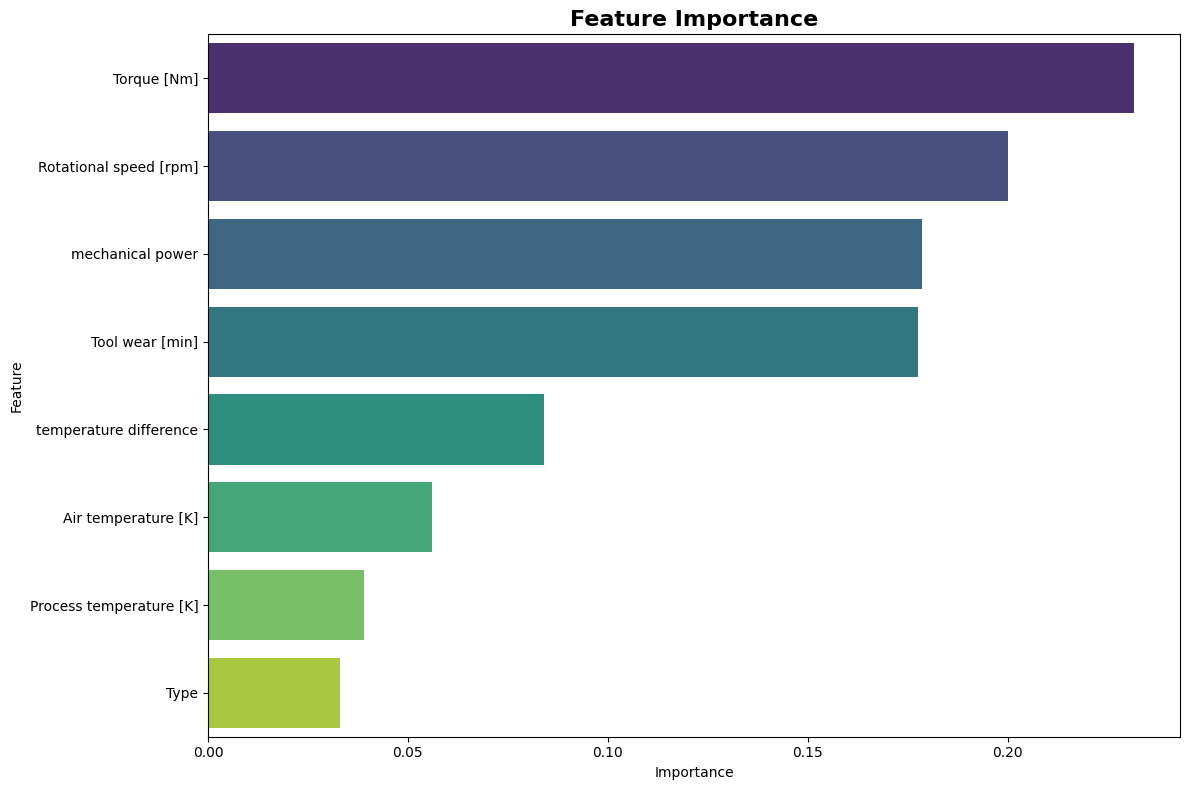

In [78]:
importances = rf.feature_importances_
feature_names = X.columns

feature_imp_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by = 'Importance', ascending = False)

plt.figure(figsize = (12,8))
sns.barplot(x = 'Importance', y = 'Feature', data = feature_imp_df, palette = 'viridis')
plt.title('Feature Importance', fontsize = 16, fontweight = 'bold')
plt.tight_layout()
plt.show